## Linear Regression on Boston Housing Dataset

We will take the Housing dataset which contains information about different houses in Boston. There are 506 samples and 13 feature variables in this dataset. 

The objective is to predict the value of prices of the house using the given features.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define column names
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
# load data, check pandas.read_csv usage: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
boston = pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/Week_4/housing.csv', delim_whitespace=True, names=names)

In [4]:
print("Boston housing dataset has {} data points with {} variables each.".format(*boston.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [5]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### The features can be summarized as follows:

CRIM: Per capita crime rate by town<br />
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft<br />
INDUS: Proportion of non-retail business acres per town<br />
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br />
NOX: Nitric oxide concentration (parts per 10 million)<br />
RM: Average number of rooms per dwelling<br />
AGE: Proportion of owner-occupied units built prior to 1940<br />
DIS: Weighted distances to five Boston employment centers<br />
RAD: Index of accessibility to radial highways<br />
TAX: Full-value property tax rate per 10,000 dollars<br />
PTRATIO: Pupil-teacher ratio by town<br />
B: the proportion of people of African American descent by town<br />
LSTAT: Percentage of lower status of the population<br />
MEDV: Median value of owner-occupied homes in $1000s<br />

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

In [6]:
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Data preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [7]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


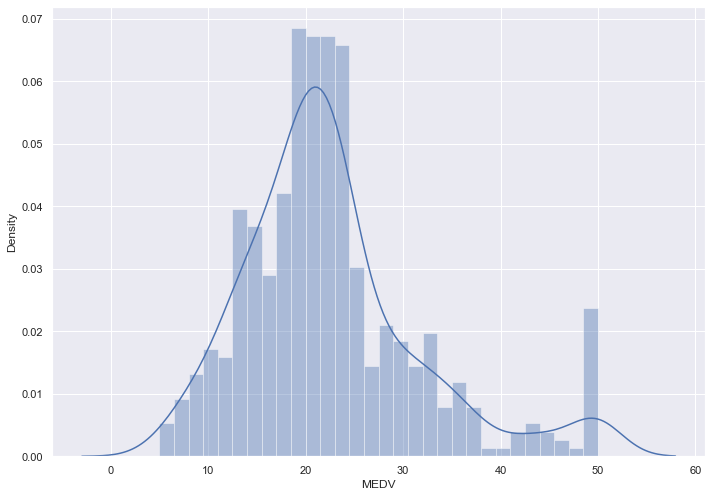

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

We see that the values of MEDV are distributed normally with few outliers. You can also use the histogram plot function from the matplotlib library.

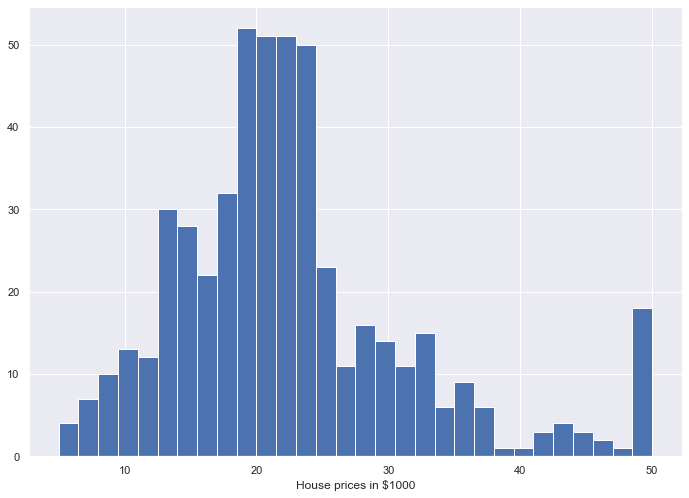

In [9]:
plt.hist(boston['MEDV'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

Let's see how these features plus MEDV distributions looks like

In [10]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarn

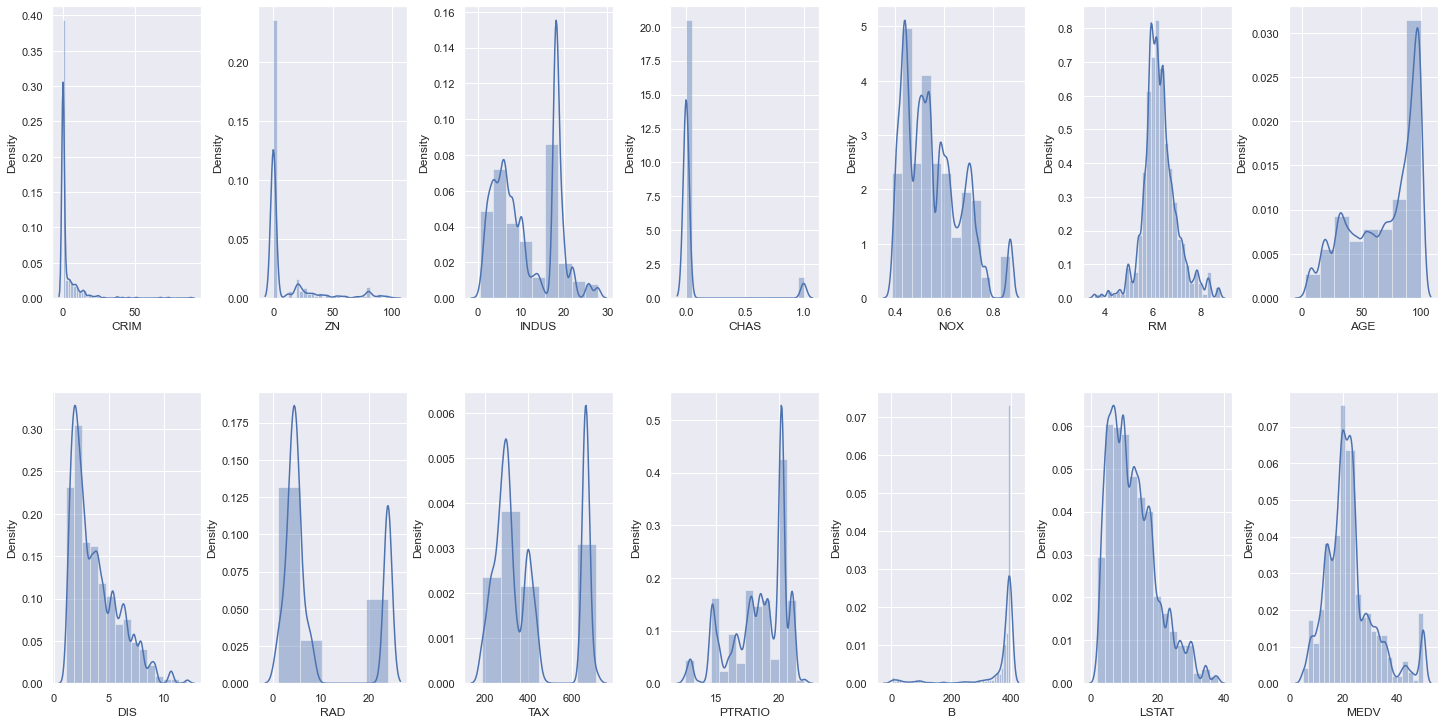

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.distplot(v, ax=axs[index], kde_kws={'bw':0.1})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

In [12]:
correlation_matrix = boston.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


<AxesSubplot:>

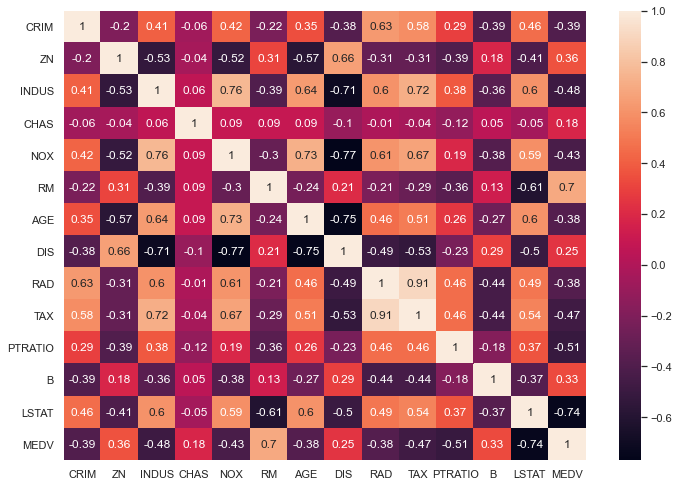

In [13]:
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Observations:

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

In [14]:
from sklearn.linear_model import LinearRegression

## Set up train and test dataset

In [15]:
X = boston[['LSTAT', 'RM','PTRATIO','INDUS','TAX','NOX','CRIM','ZN','CHAS','AGE','DIS','RAD','B']]
Y = boston['MEDV']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

## Fit linear regression model on train dataset

In [17]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

## Evaluating performance on train and test data

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
Y_train_predict = linear_model.predict(X_train)
mse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

MSE is 4.741000992236516
R2 score is 0.738339392059052


In [20]:
Y_test_predict = linear_model.predict(X_test)
mse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

MSE is 4.568292042303171
R2 score is 0.7334492147453118


## Linear Regression Model

In [21]:
linear_model.coef_

array([-5.94076089e-01,  3.41397332e+00, -9.52369666e-01,  1.09535045e-03,
       -1.31718155e-02, -1.59570504e+01, -1.30799852e-01,  4.94030235e-02,
        2.70536624e+00,  1.11887670e-03, -1.49308124e+00,  3.64422378e-01,
        1.17492092e-02])

In [22]:
linear_model.intercept_

37.91248700974951

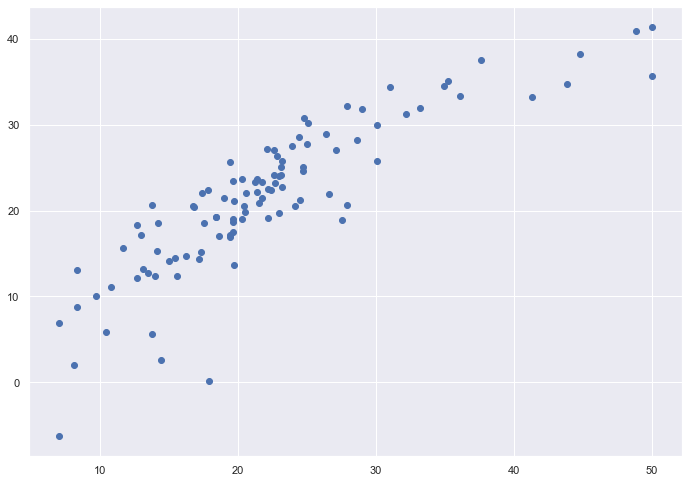

In [23]:
plt.scatter(Y_test, Y_test_predict)
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Checking multicollinearity using variance inflation factor

In [25]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [26]:
vif_data

,feature,VIF
0,LSTAT,11.102025
1,RM,77.948283
2,PTRATIO,85.029547
3,INDUS,14.485758
4,TAX,61.227274
5,NOX,73.894947
6,CRIM,2.100373
7,ZN,2.844013
8,CHAS,1.152952
9,AGE,21.386850


## Checking for outliner - Can we remove any data here?

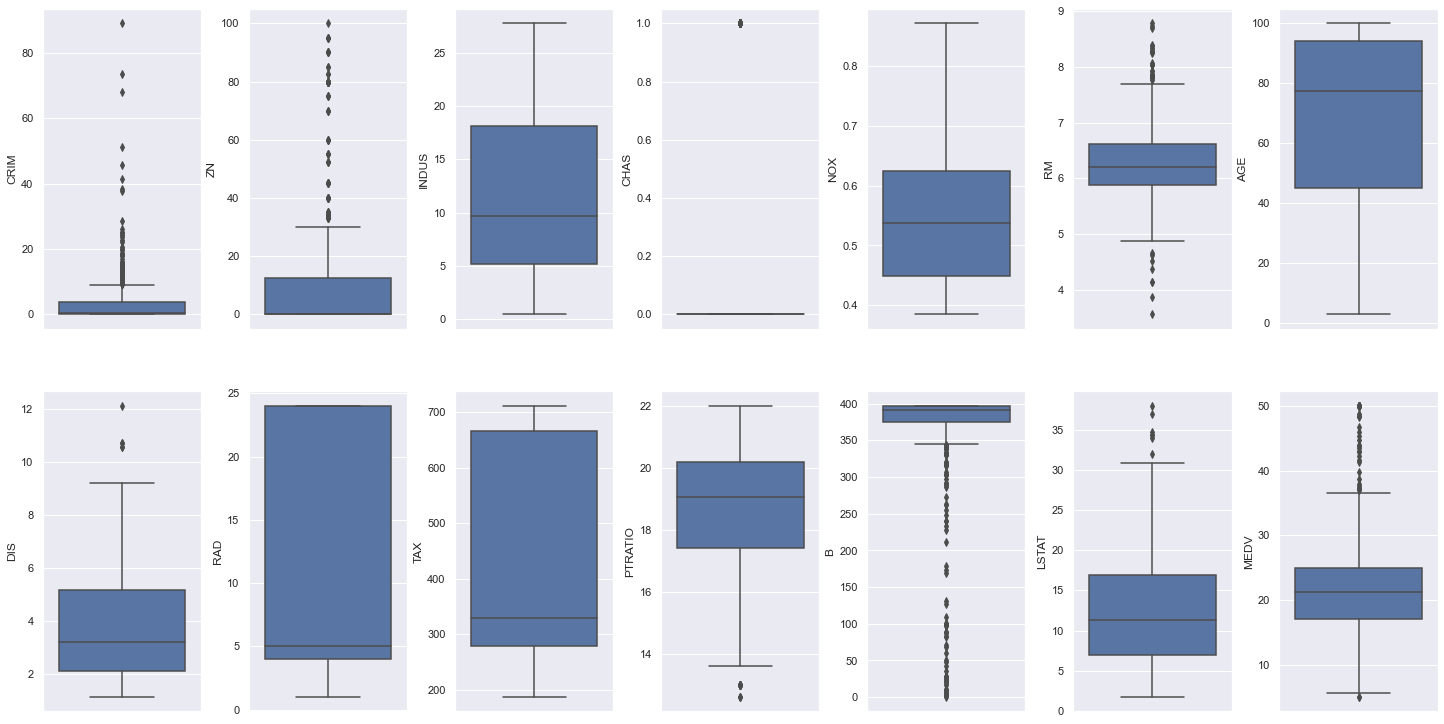

In [27]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.boxplot(y=k, data=boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Checking for skewness in data

In [28]:
X.skew(axis=0,skipna=True)

LSTAT      0.906460
RM         0.403612
PTRATIO   -0.802325
INDUS      0.295022
TAX        0.669956
NOX        0.729308
CRIM       5.223149
ZN         2.225666
CHAS       3.405904
AGE       -0.598963
DIS        1.011781
RAD        1.004815
B         -2.890374
dtype: float64

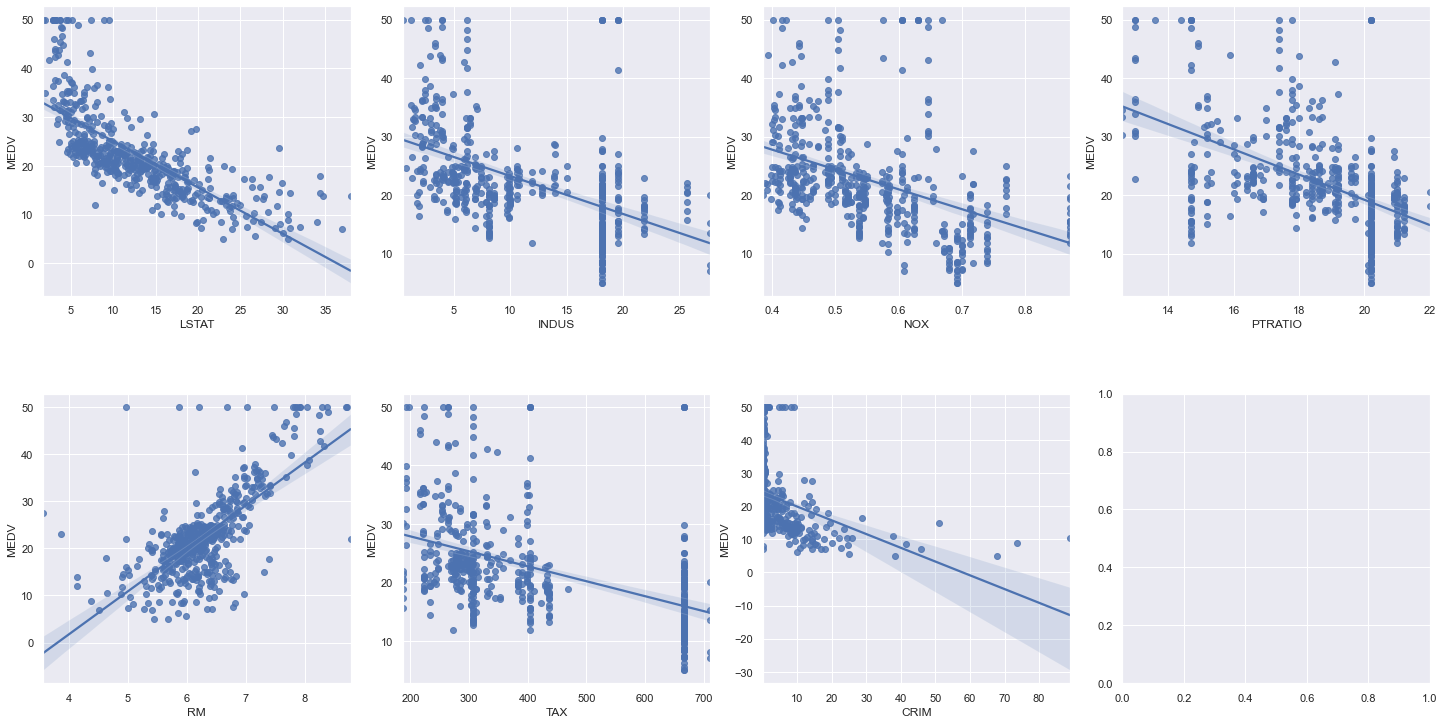

In [29]:
features = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'CRIM']
X1 = boston.loc[:,features]
Y1 = boston['MEDV']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(features):
    sns.regplot(y=Y1, x=X1[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [30]:
for col in X1.columns:
        X[col] = np.log(X[col])

<ipython-input-30-01468371e43b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = np.log(X[col])


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

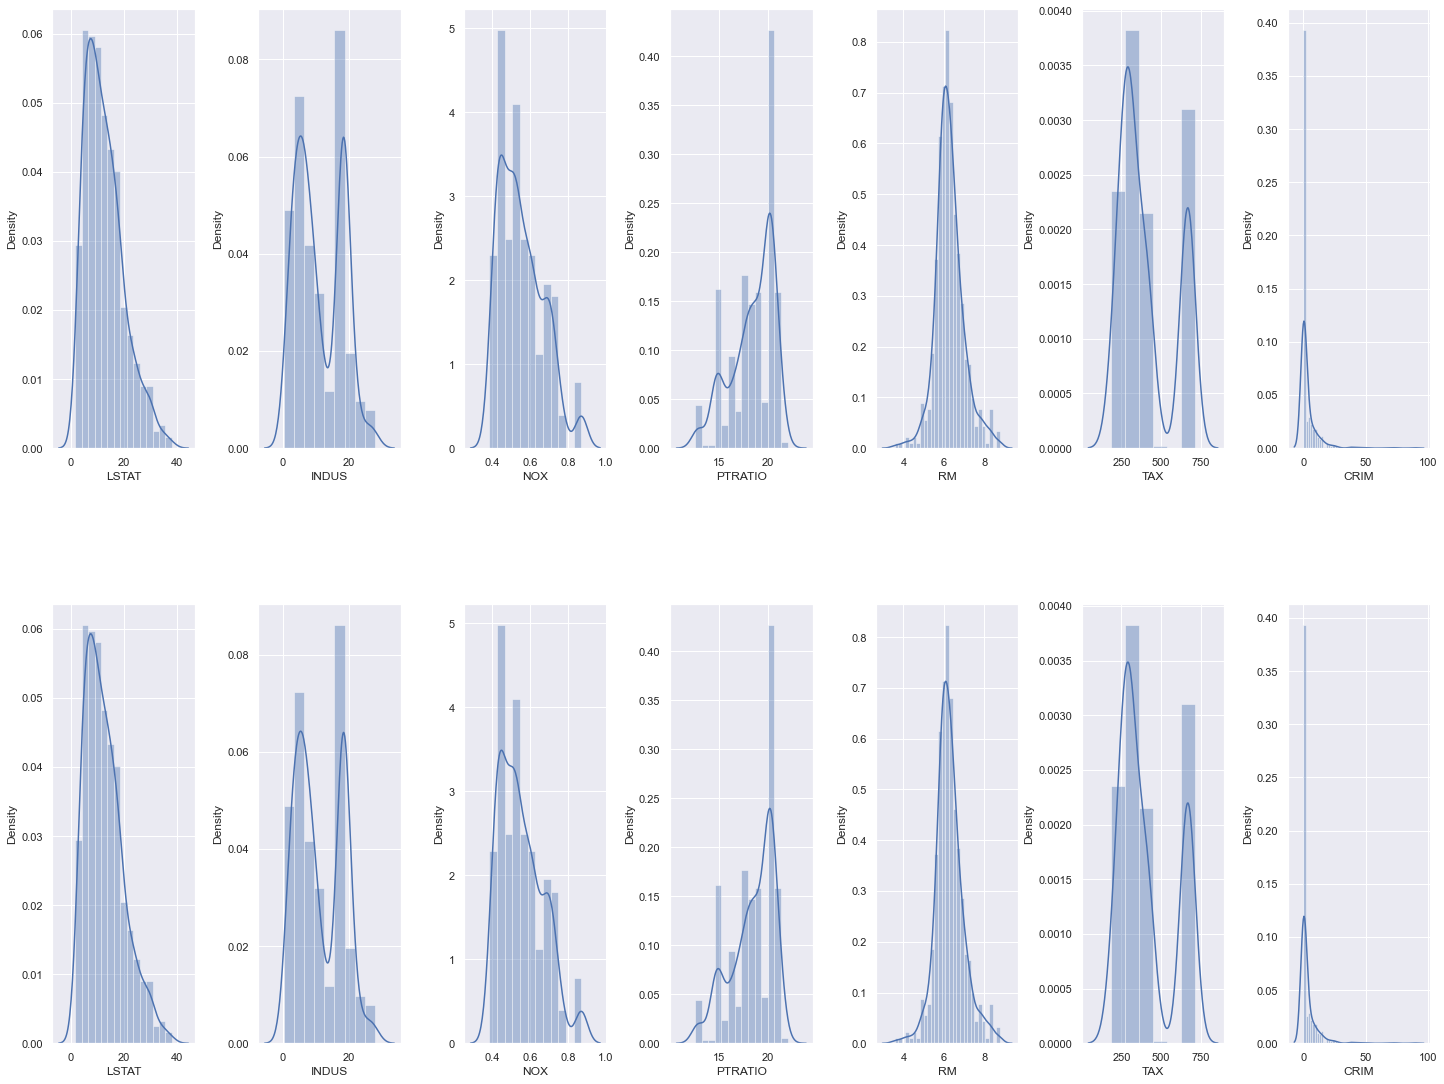

In [31]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in X1.items():
    sns.distplot(v, ax=axs[index])
    index += 1
for k,v in boston.loc[:,features].items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=10.0)

In [32]:
vif_data = pd.DataFrame()
vif_data["features"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(len(X1.columns))]
vif_data

,features,VIF
0,LSTAT,9.674058
1,INDUS,11.572761
2,NOX,61.281075
3,PTRATIO,58.143954
4,RM,58.594013
5,TAX,20.233163
6,CRIM,1.856027


## New feautures with log transformed data

In [33]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state=5)

In [34]:
linear_model_1 = LinearRegression()
linear_model_1.fit(X1_train, Y1_train)

LinearRegression()

## Evaluate training data

In [35]:
y1_train_predict = linear_model_1.predict(X1_train)
mse = (np.sqrt(mean_squared_error(Y1_train, y1_train_predict)))
r2 = r2_score(Y1_train, y1_train_predict)
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

MSE is 5.274072419909306
R2 score is 0.6761898696013298


## Evaluate test data

In [36]:
y1_test_predict = linear_model_1.predict(X1_test)
mse = (np.sqrt(mean_squared_error(Y1_test, y1_test_predict)))
r2 = r2_score(Y1_test, y1_test_predict)
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

MSE is 4.90696147730172
R2 score is 0.6924628794286802


In [37]:
linear_model_1.coef_

array([-6.24546495e-01,  4.89602176e-02, -4.32139280e-01, -9.43721657e-01,
        4.06395273e+00,  2.09711924e-04, -7.34460318e-02])

In [38]:
linear_model_1.intercept_

22.15519882963052

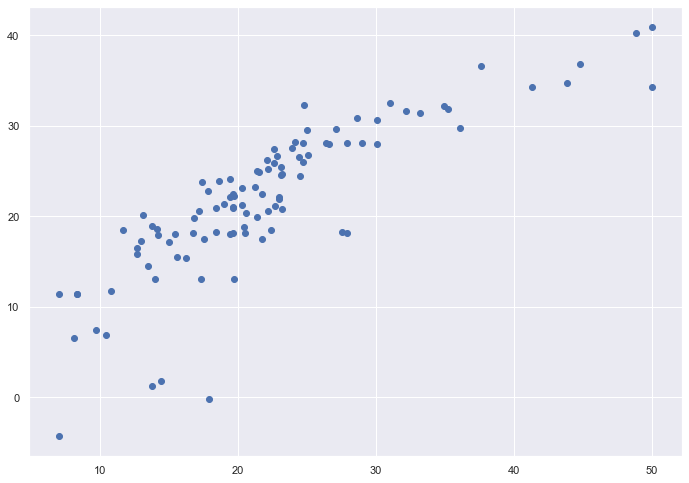

In [39]:
plt.scatter(Y1_test, y1_test_predict)
plt.show()